In [305]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [306]:
# load the dataset
df=pd.read_csv("E:\\pantech solutions\\ML\\28\\Code\\pima-indians-diabetes.csv",delimiter=',')

In [307]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [308]:
df.shape

(767, 9)

In [309]:
# split the data for train and test
X=df.iloc[:,0:8]
y=df.iloc[:,8]

In [310]:
# segregating data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [311]:
# scaling data points in between 0 and 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## tensorflow

In [312]:
# import required tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [313]:
# lets initialize ANN
classifier=Sequential()

In [314]:
# Adding inputlayer
classifier.add(Dense(units=8,activation='relu'))

In [315]:
# Adding first hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.05))

In [316]:
# Adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.05))

In [317]:
# Adding Output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [318]:
## Compile
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [319]:
## early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [320]:
model_history=classifier.fit(X_train,y_train,validation_split=0.30, batch_size=40,epochs=30,callbacks=early_stopping)

Epoch 1/30
11/11 [==============================] - 4s 66ms/step - loss: 0.7646 - accuracy: 0.3683 - val_loss: 0.7537 - val_accuracy: 0.3424
Epoch 2/30
11/11 [==============================] - 0s 10ms/step - loss: 0.7395 - accuracy: 0.4103 - val_loss: 0.7292 - val_accuracy: 0.3913
Epoch 3/30
11/11 [==============================] - 0s 9ms/step - loss: 0.7221 - accuracy: 0.4336 - val_loss: 0.7137 - val_accuracy: 0.3804
Epoch 4/30
11/11 [==============================] - 0s 9ms/step - loss: 0.7093 - accuracy: 0.4312 - val_loss: 0.7030 - val_accuracy: 0.4130
Epoch 5/30
11/11 [==============================] - 0s 12ms/step - loss: 0.6989 - accuracy: 0.4825 - val_loss: 0.6963 - val_accuracy: 0.4783
Epoch 6/30
11/11 [==============================] - 0s 10ms/step - loss: 0.6941 - accuracy: 0.5175 - val_loss: 0.6903 - val_accuracy: 0.5707
Epoch 7/30
11/11 [==============================] - 0s 9ms/step - loss: 0.6908 - accuracy: 0.5618 - val_loss: 0.6859 - val_accuracy: 0.5924
Epoch 8/30
11/11

limit_output extension: Maximum message size of 10000 exceeded with 10012 characters

In [321]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

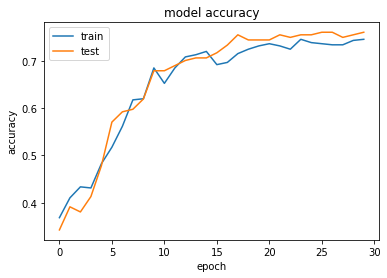

In [322]:
# summarize history for accuracy
plt.plot( model_history.history['accuracy'])
plt.plot( model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'])
plt.show()

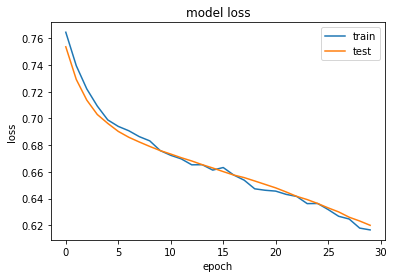

In [323]:
# summarize history for accuracy
plt.plot( model_history.history['loss'])
plt.plot( model_history.history['val_loss'])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train','test'])
plt.show()

In [324]:
# prediction 
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

5/5 [==============================] - 0s 2ms/step


In [325]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[88,  9],
       [24, 33]], dtype=int64)

In [326]:
## accuracy score
from sklearn.metrics import accuracy_score
score=((accuracy_score(y_test,y_pred))*100).round(2)
print("the accuracy is : {} %".format(score))

the accuracy is : 78.57 %


In [327]:
## get the weights
classifier.get_weights()

[array([[ 0.45558068, -0.09574426,  0.23085546,  0.42950737, -0.07033363,
          0.64338154,  0.46260312, -0.41741997],
        [-0.01229913,  0.11703403, -0.37408295, -0.00935516, -0.09867535,
          0.4726933 ,  0.61432886,  0.28355122],
        [-0.01449628, -0.4328628 , -0.1478266 ,  0.45328507,  0.07103057,
         -0.19613281,  0.42265525,  0.0758561 ],
        [ 0.01229758,  0.22002608, -0.14800401,  0.5895471 ,  0.1323312 ,
         -0.29020363,  0.45721167,  0.02720019],
        [ 0.53606826,  0.26234904, -0.2607918 , -0.37337378, -0.2680134 ,
         -0.17336099, -0.46588394,  0.48742008],
        [-0.3654088 ,  0.5952989 , -0.00235725,  0.6018345 , -0.09489055,
          0.57451016,  0.21769272,  0.40748495],
        [-0.34097728,  0.04831513,  0.31341475, -0.14731894, -0.3999099 ,
         -0.16970453, -0.1514709 , -0.2869042 ],
        [-0.54519385, -0.48324823, -0.41441858, -0.5594965 ,  0.4553949 ,
         -0.4552561 ,  0.563114  , -0.50337684]], dtype=float32),